In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
(X_train, y_train),(X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)


--------------------------------------------------
Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)
--------------------------------------------------
Test data X shape: (10000, 32, 32, 3)
Test data y shape: (10000, 1)
--------------------------------------------------


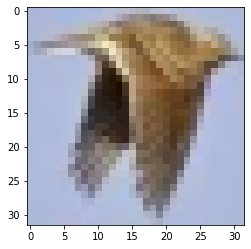

In [ ]:
i_image = 123
plt.imshow(X_train[i_image,:,:])
plt.show()


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [ ]:
y = np.concatenate([y_train, y_test], axis = 0)
y = tf.keras.utils.to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]


In [ ]:
drop_prob = 0.7
my_model = Sequential()

#1st convolution + pooling
my_model.add(Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(5,5), padding="same", activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

#2nd convolution + pooling
my_model.add(Conv2D(filters=64, kernel_size=(5,5), padding="same", activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

#Flattened fully connected layer
my_model.add(Flatten())
my_model.add(Dense(units=1024, activation="relu"))

#Apply dropout
my_model.add(Dropout(rate=drop_prob))

#Output layer
my_model.add(Dense(units=10, activation="softmax"))


In [ ]:
my_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 1024)              4

In [ ]:
n_epochs = 4
batch_size = 20
learn_rate = 0.0001


In [ ]:
my_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1)


Epoch 1/4
2000/2000 [==============================] - 199s 99ms/step - loss: 1.5776 - accuracy: 0.4263 - val_loss: 1.2878 - val_accuracy: 0.5400
Epoch 2/4
2000/2000 [==============================] - 195s 98ms/step - loss: 1.2370 - accuracy: 0.5609 - val_loss: 1.1133 - val_accuracy: 0.6079
Epoch 3/4
2000/2000 [==============================] - 198s 99ms/step - loss: 1.1000 - accuracy: 0.6133 - val_loss: 1.0701 - val_accuracy: 0.6226
Epoch 4/4
2000/2000 [==============================] - 198s 99ms/step - loss: 1.0030 - accuracy: 0.6461 - val_loss: 0.9577 - val_accuracy: 0.6678


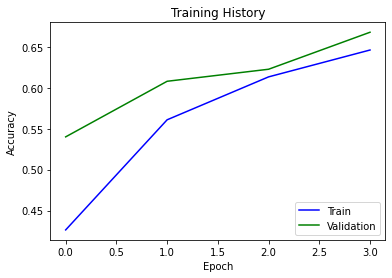

In [ ]:
n_skip = 0
plt.plot(my_summary.history["accuracy"][n_skip:], c="b")
plt.plot(my_summary.history["val_accuracy"][n_skip:], c="g")
plt.title("Training History")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")
plt.show()


In [ ]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {}".format(np.round(ACC,3)))


Test Accuracy: 0.669
